## **Deep Learning : Handwritten Digit Recognition using MNIST dataset**

Project Name: MNIST Digit Recognition using Neural Networks

Description: This notebook trains and compares Fully Connected Neural Networks (FCNN) and Convolutional Neural Networks (CNN) for handwritten digit classification using the MNIST dataset.

Objective: To analyze the effectiveness of CNNs over FCNNs and improve classification accuracy.



**About the dataset:**

The MNIST dataset is a widely used benchmark dataset for image classification, particularly in Deep Learning.
* It consist of handwritten digits(0-9)
* It contains 60,000 training images and 10,000 test images in grayscale.
* Each image is 28x28 pixels, grayscale.
* Labels range from 0 to 9, representing digits.




## Using Fully Connected Neural Network

A Fully Connected Neural Network (FCNN), also called a Multi-Layer Perceptron (MLP), is a type of artificial neural network where every neuron in one layer is connected to every neuron in the next layer. It is widely used for classification problems.

**Structure of a Fully Connected Neural Network**

1. **Input Layer:** Receives the raw data (e.g., images, text, numbers). Each neuron represents a feature of the input.
2. **Hidden Layers:** One or more layers between input and output, where computations take place. Each neuron in a hidden layer applies a weight and bias, followed by an activation function (e.g., ReLU, Sigmoid).
3. **Output Layer:** Produces the final result, such as classification labels or regression values.

**How It Works**

1. Forward Propagation:

The input data is passed through the network layer by layer.
Each neuron performs a weighted sum of its inputs and applies an activation function.
The result moves to the next layer until it reaches the output layer.

2. Loss Calculation:

The output is compared with the actual target value using a loss function (e.g., Mean Squared Error, Cross-Entropy).

3. Backpropagation & Optimization:

The error is propagated backward using an optimization algorithm (e.g., Gradient Descent, Adam).
The network updates its weights to minimize the loss.

In [ ]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

#Load the MNIST dataset
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


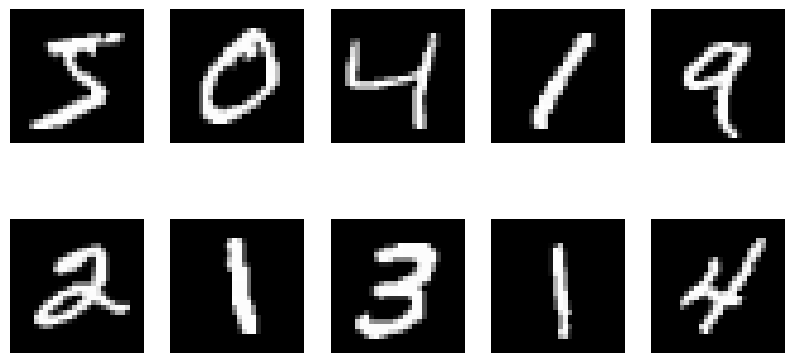

In [ ]:
#Show dataset shape
print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")

#Display some sample images
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('off')
plt.show()

## **Preprocessing The data**

Before feeding data into neural network , we need to normalize the pixel values (0-255 -> 0-1)and reshape the input.

### 1.Normalization (Scaling Pixels 0-255 -> 0-1)

* Neural networks work best when input values are small and normalized.
* We divide each pixel value by 255 to scale it between 0 and 1, making training more efficient.

### 2. Reshaping the Data(Flattening 28 x 28 -> 784)

* The MNIST images are grayscale 28 x 28 pixel matrices.
* Since a fully connected neural network (MLP - Multi layer Perceptron) requirs a 1D input vector, we reshape each image into a single vector of 784 values(28 x 28 = 784).

In [ ]:
# Normalize pixel values (0-255 -> 0-1) for better model performance

x_train = x_train/255.0
x_test = x_test/255.0

# Flatten?reshape the images(28*28 -> 784)

x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# Print new shape

print(f"New Training set shape: {x_train.shape}")
print(f"New Testing set shape: {x_test.shape}")

New Training set shape: (60000, 784)
New Testing set shape: (10000, 784)


## **Building a Neural Network Model**
We create a feedforward neural network with

* **Input Layer: 784 neurons(one for each pixel)**
 * Each neuron represent a pixel from the image.
 * Since our input images are flattened into 784 values, this layer simply passes the input to the next layer.
* **Hidden Layer: 128 neurons(with ReLu activation)**
 * We use 128 neurons, meaning each image is transformed into a 128-dimensional feature representation.
 * Activation Function: ReLU (Rectified Linear Unit)
   * ReLu helps prevent vanishing gradients.
   * It allows faster training since negative values are set to zero.
 * Dropout Layer (Regularization)
   * Dropout(0.2) randomly deactivates 20% of neurons during training.
   * This helps prevent overfitting (memorizing instead of generalizing).

* **Output Layer: 10 neurons(one for each digit)**
  * We need 10 neurons (one for each digit 0-9).
  * Each neuron outputs a probability for its corresponding digit.
  * Softmax Activation ensures that the outputs sum to 1, making it a
  probability distribution:

In [ ]:
# build the neural network
model = keras.models.Sequential([
    keras.layers.Dense(128,activation='relu',input_shape=(784,)),# Hidden layer
    keras.layers.Dropout(0.2), # Dropout for Regularization
    keras.layers.Dense(10,activation='softmax') #Output layer
])

# compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## **Train and Evaluate the Model**

### Forward Pass (During Training)
   1) Input image (28×28 pixels) is flattened into a vector (1×784).

   2) Passes through 128 neurons in the hidden layer (ReLU applied).

   3) Passes through 10 neurons in the output layer (Softmax applied).

   4) Outputs probabilities for each digit (0-9).

### Backpropagation (Updating Weights)
* The model compares predictions to true labels using the loss function 'sparse_categorical_crossentropy':
* This calculates how far the prediction is from the actual label.
* The model then updates weights using the Adam optimizer:
* Adam automatically adjusts learning rates for faster convergence.





In [ ]:
# Train the model
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8620 - loss: 0.4836 - val_accuracy: 0.9583 - val_loss: 0.1398
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9535 - loss: 0.1547 - val_accuracy: 0.9674 - val_loss: 0.1053
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9672 - loss: 0.1091 - val_accuracy: 0.9735 - val_loss: 0.0823
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9730 - loss: 0.0867 - val_accuracy: 0.9760 - val_loss: 0.0777
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9769 - loss: 0.0734 - val_accuracy: 0.9775 - val_loss: 0.0743
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9797 - loss: 0.0642 - val_accuracy: 0.9786 - val_loss: 0.0713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9821 - loss: 0.0561 - val_accuracy: 0.9779 - val_loss: 0.0739
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9840 - loss: 0.

## Model Evaluation

* The model is tested on unseen images (test set).
* It predicts a digit for each test image.
* The accuracy is calculated based on correct predictions.



In [ ]:
# Evaluate on Test data
test_loss,test_acc = model.evaluate(x_test,y_test)

print(f"Test Accuracy:{test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0844
Test Accuracy:0.9794


## Summary of Steps

1) Preprocess: Normalize pixel values (0-1), reshape (28×28 → 784).

2) Build Model: Input (784) → Hidden (128, ReLU, Dropout) → Output (10, Softmax).

3) Train Model: Forward pass → Calculate Loss → Backpropagation → Update Weights.

4) Evaluate: Test on new data → Measure Accuracy.

## How to improve accuracy

* If accuracy is low, we can improve it by tuning hyperparameters, adding layers, or using CNNs!

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Dense(256,activation='relu',input_shape=(784,)),# Hidden layer
    keras.layers.Dropout(0.2), # Dropout for Regularization
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation = 'softmax') # Dropout for Regularization
])

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model summary
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1 = model1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

test_loss1, test_acc1 = model1.evaluate(x_test,y_test)

print(f"Test Accuracy:{test_acc1:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8585 - loss: 0.4586 - val_accuracy: 0.9669 - val_loss: 0.1025
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9622 - loss: 0.1258 - val_accuracy: 0.9741 - val_loss: 0.0809
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9717 - loss: 0.0910 - val_accuracy: 0.9772 - val_loss: 0.0779
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9771 - loss: 0.0728 - val_accuracy: 0.9789 - val_loss: 0.0676
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9796 - loss: 0.0650 - val_accuracy: 0.9762 - val_loss: 0.0778
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9823 - loss: 0.0546 - val_accuracy: 0.9748 - val_loss: 0.0857
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9846 - loss: 0.0465 - val_accuracy: 0.9786 - val_loss: 0.0757
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9847 - loss: 0

## Using CNN(Convolutional Neural Network)

Let's dive into Convolutional Neural Networks (CNNs) and how they improve performance on the MNIST dataset compared to a basic fully connected neural network

### Why CNN Instead of a Fully Connected Network?

1) Preserves Spatial Structure

* In a fully connected (Dense) network, we flatten the image (28×28 → 784), losing spatial relationships.
* CNNs keep the 2D structure intact, making them better for image analysis.

2) Uses Local Patterns (Edges, Shapes, Textures)

* CNNs use filters (kernels) to extract important features like edges, curves, and textures.
* Unlike a Dense network, which treats each pixel individually, CNNs identify meaningful patterns.

3) Fewer Parameters & Faster Training

* Fully connected layers have millions of parameters → Prone to overfitting.
* CNNs share weights across neurons, reducing the number of parameters and improving efficiency.


### CNN Architecture for MNIST
A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for image processing and pattern recognition. Unlike Fully Connected Neural Networks (FCNNs), CNNs preserve spatial relationships between pixels, making them highly efficient for analyzing images, videos, and even sequential data.

A basic CNN consists of:

**Convolutional Layer (Conv2D) → Detects features (edges, patterns)**

Applies filters (kernels) to detect features like edges, textures, and patterns in an image.

Each filter slides over the input image (this process is called convolution) to create a feature map.

The filters learn different characteristics, such as corners in early layers and complex shapes in deeper layers.

**Pooling Layer (MaxPooling2D) → Reduces dimension**

Reduces the size of feature maps while preserving important features.

Common pooling techniques:

Max Pooling: Selects the maximum value in each region.

Average Pooling: Takes the average of values in each region.

**Flatten Layer → Converts feature maps into a vector**

* Convolutional and pooling layers maintain spatial relationships (height, width, and depth). However, the fully connected layers require a 1D input to perform classification. Flattening bridges this gap.
* The essential features learned from convolution and pooling operations are retained but reshaped into a single vector.

**Fully Connected Layer (Dense) → Classifies the digit**

* The Fully Connected (FC) Layer is the final stage in a Convolutional Neural Network (CNN). It takes the flattened feature maps from previous layers and learns patterns to classify the input into different categories.

* The FC layer combines all extracted features and assigns weights to determine the final classification output.
* If the task is classification, a Softmax activation is used to output probabilities for each class.

* If it's a regression problem, a linear activation (no activation) is used.



In [ ]:
# importing Libraries

import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

# Load dataset

(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Normalizing the data

x_train = x_train/255.0
x_test = x_test/255.0


### Reshape images to (28,28,1) for CNN input
* CNNs are designed to process 3D inputs: (height, width, channels).
* We reshape MNIST images to (28,28,1) because CNNs require a "channel" dimension, even for grayscale images.
* (28,28) → The height and width of the image.
* 1 → The number of color channels.
  * Since MNIST images are grayscale, we only have 1 channel.
  * If it were a colored image (RGB), the shape would be (28,28,3) (3 channels for Red, Green, and Blue).
* This allows the CNN to correctly apply convolutional filters and learn spatial features
* Each filter (kernel) in a convolutional layer operates across all channels.

In [ ]:
# Reshape image to (28,28,1) for CNN input
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [ ]:
# CNN model
model2 = keras.models.Sequential([layers.Conv2D(32,(3,3),activation ='relu',input_shape=(28,28,1) ),#Uses 32 filters of size (3×3).
                                                                                                   #Outputs a new set of feature maps.
                                                                                                  #Relu applies non-linearity, allowing the network to learn complex patterns.
                                 layers.MaxPooling2D((2,2)),  #(2,2) means it reduces the image by half. Helps reduce overfitting.

                                 layers.Conv2D(64,(3,3),activation='relu'),
                                 layers.MaxPooling2D((2,2)),

                                 layers.Flatten(),
                                 layers.Dense(128,activation='relu'),
                                 layers.Dense(10,activation='softmax')
                                                   ])

#compile the model
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model summary
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training and Evaluation

In [ ]:
history2 = model2.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

#Evaluation
test_loss,test_acc = model2.evaluate(x_test,y_test)

print(f"Test Accuracy:{test_acc:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.9087 - loss: 0.3001 - val_accuracy: 0.9859 - val_loss: 0.0439
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9856 - loss: 0.0475 - val_accuracy: 0.9883 - val_loss: 0.0336
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9912 - loss: 0.0293 - val_accuracy: 0.9880 - val_loss: 0.0342
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9938 - loss: 0.0210 - val_accuracy: 0.9906 - val_loss: 0.0286
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9956 - loss: 0.0142 - val_accuracy: 0.9882 - val_loss: 0.0380
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9964 - loss: 0.0103 - val_accuracy: 0.9878 - val_loss: 0.0414
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9916 - val_loss: 0.0349
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9979 -

#### Confusion Matrix and classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


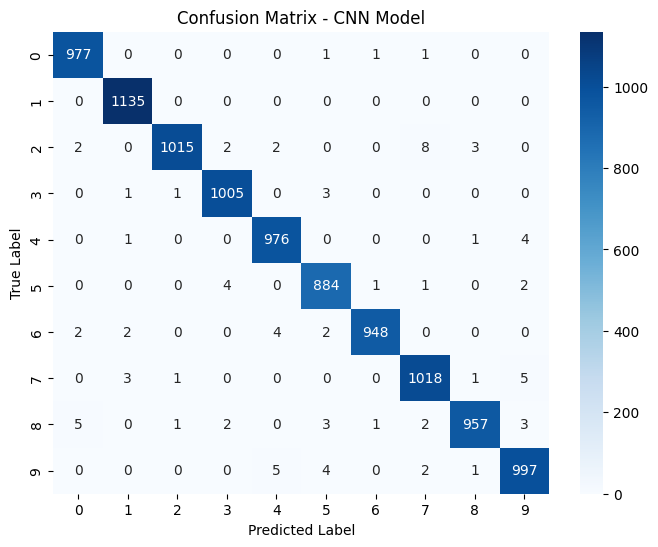

In [ ]:
# Get model predictions
y_pred = model2.predict(x_test)  # Use CNN model
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN Model")
plt.show()


In [ ]:
np.bincount(y_test)

array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

**Interpretation of the confusion matrix heatmap**

When we generate a confusion matrix heatmap using seaborn.heatmap(), it visually represents the performance of our classification model.

**Confusion Matrix**:A confusion matrix is a table that compares the actual (true) labels and the predicted labels of our model. It helps to analyze misclassifications and measure model accuracy.

**Diagonal Elements (True Positives) → Correct Predictions**

* The diagonal values (from top-left to bottom-right) show the number of correct predictions.

* Example: cm[0,0] = 977 → out of 980 true "0" images 977 were correctly classified as "0".

* A strong model will have high values along the diagonal.

**Off-Diagonal Elements → Misclassifications**

* Non-diagonal values represent misclassifications (where the model predicted the wrong digit).

* Example: cm[5,3] = 4 → 4 image of digit "5" was incorrectly classified as "3".

**Diagonal values** = Correct classifications (higher is better).
**Off-diagonal values** = Misclassified images (lower is better).




In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## CNN Vs Fully connected Neural Network(FCNN)

#### Results & Accuracy
Fully Connected Network: ~98% accuracy

CNN Model: ~99% accuracy

CNN is better for image-based tasks because it learns patterns and reduces unnecessary computations.

### Performance Plot

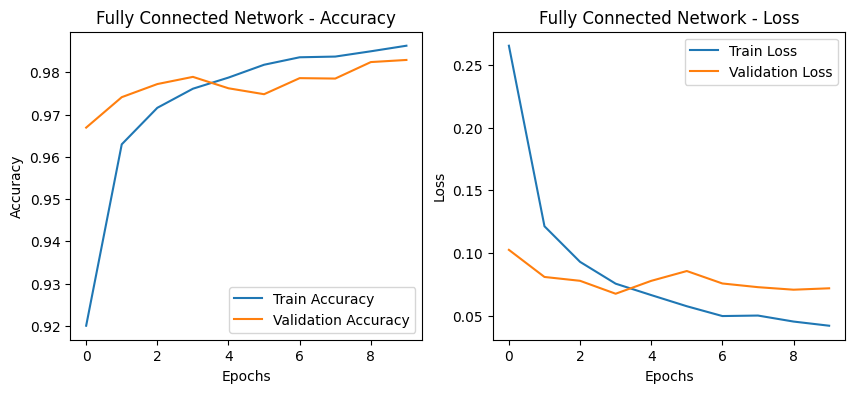

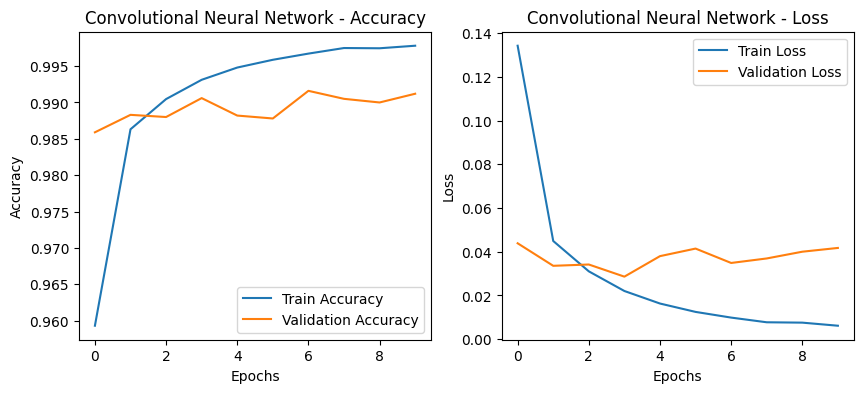

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training(history, title):
    plt.figure(figsize=(10,4))

    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title + " - Accuracy")

    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + " - Loss")

    plt.show()

# Call this function for both models after training
plot_training(history1, "Fully Connected Network")
plot_training(history2, "Convolutional Neural Network")


In [ ]:
# Save trained CNN model
model2.save('mnist_cnn_model.keras')

# Save trained FCNN model
model1.save('mnist_fcnn_model.keras')


#### Confusion Matrix and Classification Report

#### FCNN Vs CNN

<table border="1">
  <tr>
    <th>Feature</th>
    <th>Fully Connected Neural Network(FCNN)</th>
    <th>Convolutional Neural Network(CNN)</th>
  </tr>
  <tr>
    <td>Architecture </td>
    <td>Consists of multiple Dense (Fully Connected) layers.</td>
    <td>Includes Convolutional, Pooling, and Fully Connected layers.</td>
  </tr>
  <tr>
    <td>Input Handling</td>
    <td>Requires the image to be flattened (28×28 → 784 pixels).</td>
    <td>Preserves the 2D spatial structure of images.</td>
  </tr>
  <tr>
    <td>Feature Extraction</td>
    <td>Does not extract features automatically; learns raw pixel relationships.</td>
    <td>Uses filters (kernels) to detect edges, textures, and patterns.</td>
  </tr>
  <tr>
    <td>Number of Parameters</td>
    <td>Very high because every neuron is connected to all previous neurons.</td>
    <td>Lower because filters (kernels) share weights across the image.</td>
  </tr>
  <tr>
    <td>Computation Cost</td>
    <td>High due to the large number of parameters.</td>
    <td>Lower because of shared weights and fewer connections.</td>
  </tr>
  <tr>
    <td>Risk of Overfitting</td>
    <td>More prone to overfitting due to large parameters.</td>
    <td>Less overfitting due to weight sharing and pooling layers.</td>
  </tr>
  <tr>
    <td>Performance on Images</td>
    <td>Works well for simple data but struggles with complex images.</td>
    <td>Much better for image-related tasks due to hierarchical feature learning.</td>
  </tr>
  <tr>
    <td>Training Time</td>
    <td>Slower, as it requires more computations.</td>
    <td>Faster due to fewer parameters and efficient feature extraction.</td>
  </tr>
  <tr>
    <td>Use Cases</td>
    <td>Good for tabular data, structured inputs, and simple image classification.</td>
    <td>Best for image recognition, object detection, and complex vision tasks.</td>
  </tr>
</table>

    

### When to use FCNN Vs CNN
<table border="1">
  <tr>
    <th>Scenario</th>
    <th>Use FCNN</th>
    <th>Use CNN</th>
  </tr>
  <tr>
    <td>Tabular Data (Numbers, Text, Sensors, Financial Data, etc.)</td>
    <td>Best choice</td>
    <td>Not suitable</td>
  </tr>
  <tr>
    <td>Simple Image Classification (e.g., MNIST Digits)</td>
    <td>Works well</td>
    <td>Works better</td>
  </tr>
  <tr>
    <td>Complex Image Recognition (Faces, Animals, Objects, etc.)</td>
    <td>Poor performance</td>
    <td>Best choice</td>
  </tr>
  <tr>
    <td>Video Processing, Object Detection, Self-Driving Cars</td>
    <td>Not suitable</td>
    <td>Best choice</td>
  </tr>
  <tr>
    <td>Computational Efficiency Needed</td>
    <td>Slow, High Memory Usage</td>
    <td>Faster, Efficient</td>
  </tr>
</table>


**Conclusion:**

From the results, the CNN model outperforms the FCNN model in terms of accuracy and generalization. This proves that CNNs are more efficient for image classification as they capture spatial features better. Future improvements can include using Dropout, Data Augmentation, and Hyperparameter Tuning to improve accuracy further.